## t-SNE: Perplexity, Distance Mapping, and Non-linear Embedding

### 1. Overview

t-SNE (**t-distributed Stochastic Neighbor Embedding**) is a **dimensionality reduction** method that converts high-dimensional data into a low-dimensional representation (usually 2D or 3D) for visualization.
Its main goal is to preserve **local structure** — points that are close in the original space should remain close in the new space.

---

### 2. Distance Mapping

* **High-dimensional distances** are converted into **probabilities** of points being neighbors.
* Closer points → higher probability.
* Farther points → lower probability.
* In the low-dimensional map, t-SNE builds another probability distribution and tries to match it to the high-dimensional one.
* The mismatch is measured using **Kullback–Leibler (KL) divergence** and minimized during optimization.

---

### 3. Perplexity

* Perplexity controls the **effective number of neighbors** considered for each point.
* **Low perplexity** → focuses on very close neighbors (fine detail).
* **High perplexity** → considers a broader neighborhood (global patterns).
* Typical range: **5–50**.
* Think of perplexity as the “zoom level” in neighborhood size.

---

### 4. Non-linear Embedding

* t-SNE uses a **non-linear** mapping: it does not apply a single transformation like rotation or scaling (as in PCA).
* The method **warps the space** to preserve local neighborhoods as well as possible.
* This means **relative positions of far-apart clusters may not be meaningful** — only the local grouping is reliable.

---

**Summary Table**

| Concept              | Meaning                                       | Key Point                                     |
| -------------------- | --------------------------------------------- | --------------------------------------------- |
| Distance Mapping     | Convert distances into neighbor probabilities | Similar points → high probability             |
| Perplexity           | Neighborhood size parameter                   | Low = local detail, High = global structure   |
| Non-linear Embedding | Flexible mapping from high-D to low-D         | Preserves local clusters, not exact distances |


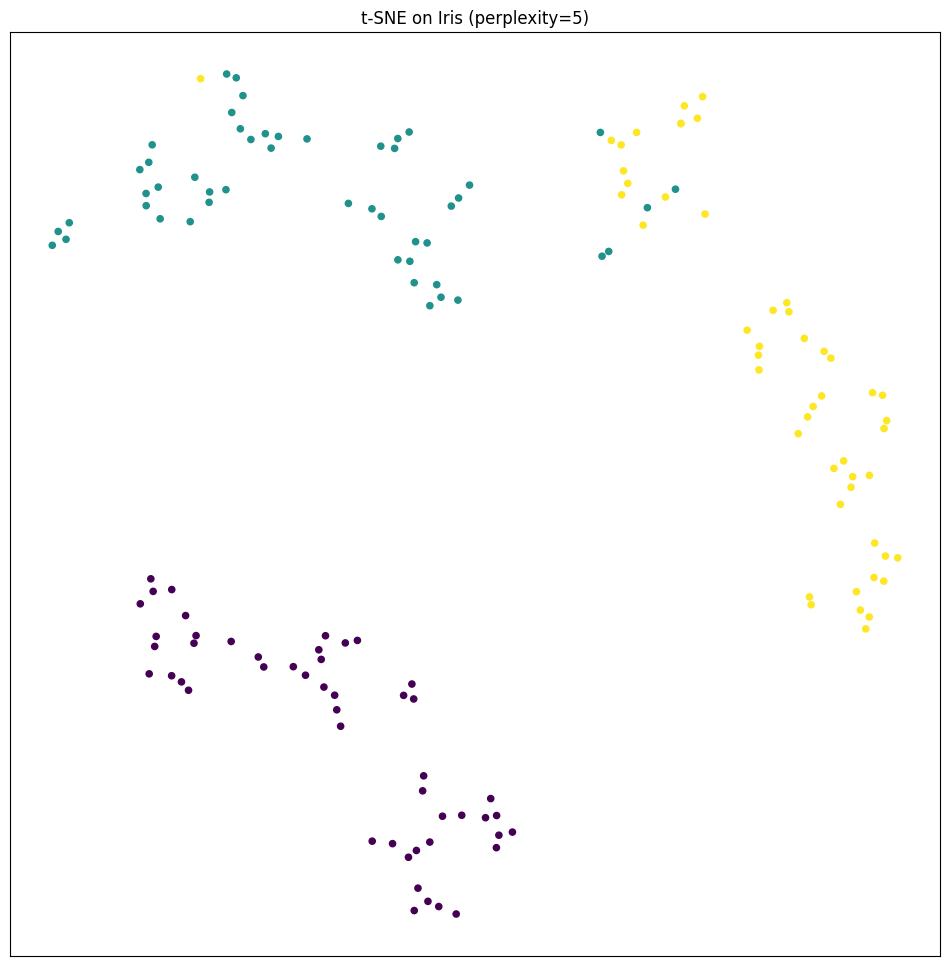

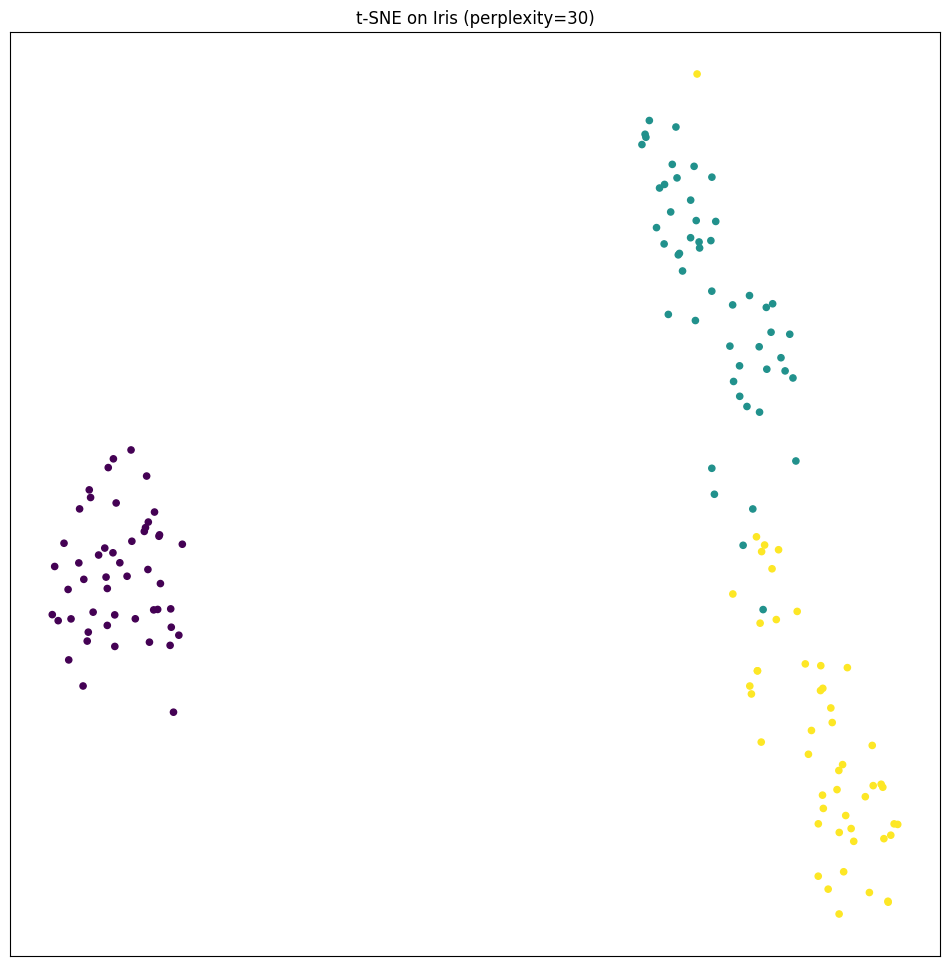

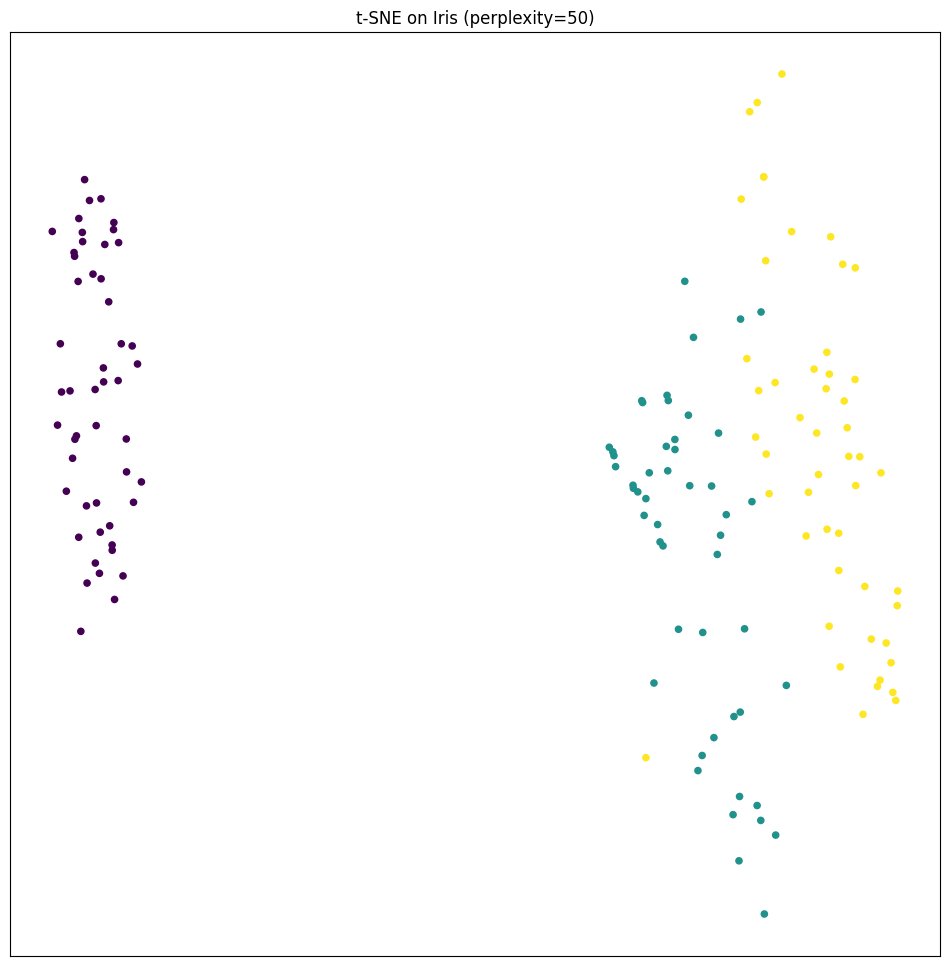

In [3]:
# t-SNE made easy (Iris dataset)
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1) Load a tiny toy dataset (150 flowers, 4 features each)
X, y = load_iris(return_X_y=True)

# 2) Try a few neighborhood sizes (perplexities)
for perp in [5, 30, 50]:
    tsne = TSNE(
        n_components=2,     # make a 2D map
        perplexity=perp,    # "how many neighbors to pay attention to"
        init="pca",         # stable start
        learning_rate="auto",
        random_state=0
    )
    Z = tsne.fit_transform(X)   # 3) Learn the non-linear 2D embedding

    # 4) Plot
    plt.figure(figsize=(12,12))
    plt.scatter(Z[:,0], Z[:,1], c=y, s=20)
    plt.title(f"t-SNE on Iris (perplexity={perp})")
    plt.xticks([]); plt.yticks([])
    plt.show()
